In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras_core as keras
import numpy as np
import pandas as pd

Using TensorFlow backend


## Load the Dataset
MNIST - dataset of handwritten digits

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape

(dtype('uint8'), (60000, 28, 28), dtype('uint8'), (60000,))

In [4]:
x_train = np.expand_dims(x_train, axis=-1).astype('float32')
x_test = np.expand_dims(x_test, axis=-1).astype('float32')
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

In [5]:
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape

(dtype('float32'), (60000, 28, 28, 1), dtype('uint8'), (60000, 1))

In [6]:
train = (x_train, y_train)
test = (x_test, y_test)

In [7]:
import matplotlib.pyplot as plt

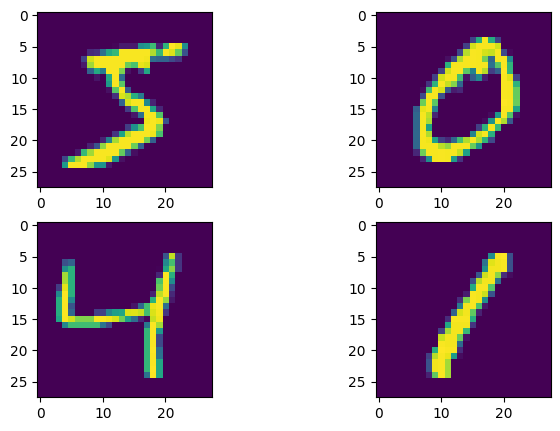

In [8]:
fig, axes = plt.subplots(2,2,figsize=(8,5))
for i in range(len(axes)):
    for j in range(len(axes)):
        axes[i][j].imshow(train[0][i*len(axes)+j])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

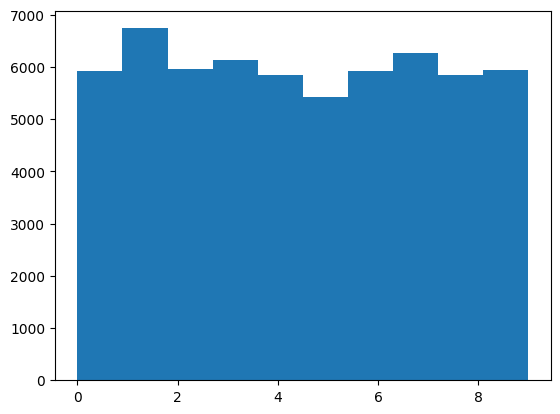

In [9]:
plt.hist(y_train)

## Set up Model

In [10]:
from keras_core import layers

In [11]:
model = keras.Sequential([
    layers.Conv2D(3,3,activation="relu"),
    layers.Conv2D(3,3,activation="relu"),
    layers.Conv2D(3,3,activation="relu"),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
inputs = layers.Input(shape=(train[0][0].shape))
x = layers.Conv2D(3,3,activation="relu")(inputs)
x = layers.Conv2D(3,3,activation="relu")(x)
x = layers.Conv2D(3,3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 3)         │         30 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 3)         │         84 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 3)         │         84 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 1452)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │     14,530 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 14,728 (57.53 KB)

 Trainable params: 14,728 (57.53 KB)

 Non-trainable params: 0 (0.00 B)

## Compile The Model

In [13]:
y_train # is it one-hot encoding or its a number indicating the class? its a number

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [14]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

## Train the Model

In [15]:
history = model.fit(x=train[0], y=train[1], batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3698 - loss: 9.7138 - val_accuracy: 0.9229 - val_loss: 0.2501
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9349 - loss: 0.2166 - val_accuracy: 0.9557 - val_loss: 0.1453
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9652 - loss: 0.1141 - val_accuracy: 0.9585 - val_loss: 0.1446
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9726 - loss: 0.0844 - val_accuracy: 0.9597 - val_loss: 0.1384
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9791 - loss: 0.0660 - val_accuracy: 0.9672 - val_loss: 0.1137


## Analyze the Model

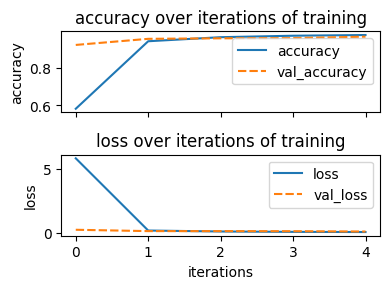

In [16]:
import seaborn as sns
# Helper function to plot accuracy and loss of the run
def plot_history(history_df):
    fig, axes = plt.subplots(2,1, sharex=True, figsize=(4,3))
    sns.lineplot(data=history_df[["accuracy", "val_accuracy"]], ax=axes[0]).set(
        title="accuracy over iterations of training",
        xlabel="iterations",
        ylabel="accuracy"
    )
    sns.lineplot(data=history_df[["loss", "val_loss"]], ax=axes[1]).set(
        title="loss over iterations of training",
        xlabel="iterations",
        ylabel="loss"
    )
    plt.tight_layout()
plot_history(pd.DataFrame(history.history))

In [17]:
y_pred = model.predict(test[0])
y_pred = np.argmax(y_pred, axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [18]:
y_true = test[1]
y_true = np.squeeze(y_true.astype('uint8'))
y_pred.shape, y_true.shape

((10000,), (10000,))

Text(58.222222222222214, 0.5, 'True Label')

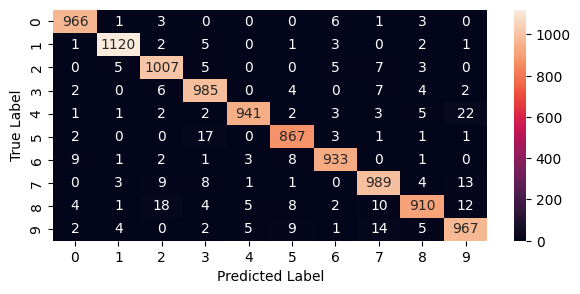

In [19]:
counts = [[0]*10 for i in range(10)]
for i in range(len(y_pred)):
    counts[y_true[i]][y_pred[i]] += 1
plt.figure(figsize=(7,3))
sns.heatmap(counts, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

## Freeze the Layers

In [20]:
for layer in model.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=conv2d_3, built=True>
<Conv2D name=conv2d_4, built=True>
<Conv2D name=conv2d_5, built=True>
<Flatten name=flatten_1, built=True>
<Dense name=dense_1, built=True>


In [21]:
for layer in model.layers[:-1]:
    layer.trainable = False

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 3)         │         30 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 3)         │         84 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 3)         │         84 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 1452)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │     14,530 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 44,186 (172.60 KB)

 Trainable params: 14,530 (56.76 KB)

 Non-trainable params: 198 (792.00 B)

 Optimizer params: 29,458 (115.07 KB)

## Swapping Out Layers

In [23]:
new_model = keras.Sequential(model.layers[:-1] + [layers.Dense(3, activation="softmax")])

In [24]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 3)         │         30 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 3)         │         84 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 3)         │         84 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 1452)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 3)                 │      4,359 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,557 (17.80 KB)

 Trainable params: 4,359 (17.03 KB)

 Non-trainable params: 198 (792.00 B)